# TP-2 Organización de Datos

# Oh La La... Data!

* **Hamma AALI CHTOUKI** --- *Padrón 106607 - Alumno regular de intercambio.*  
* **Aymeryc COUSAERT** ------  *Padrón 105464 - Alumno regular de intercambio.*
* **Mariana VINYOLAS**  ---------  *Alumna oyente.*

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 2: Import de librerias </h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as catb
import lightgbm as lgbm

import scikitplot as skplt
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

C:\anaconda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section3'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 3: Feature engineering</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [5]:

df = train
df['text'] = df['text'].str.lower()   # pasamos a lowercase
df = df.drop(['id', 'location'], axis=1)

In [6]:
df.sample(8)

,keyword,text,target
6530,survive,suicide of a superpower : will america survive...,0
6857,trauma,author interview michele rosenthal-author of y...,0
2547,destroy,ginga thinks he can defeat me? not with my l-d...,0
6742,tornado,@soonergrunt better than tornado!,0
6515,survive,escaping her captors was the 1st step. now she...,1
5156,obliterate,@klavierstuk doesn't so lvg is forced into the...,0
4498,hurricane,bluedio turbine hurricane h bluetooth 4.1 wire...,0
7501,wreck,@titortau the loretta lynch one was fuckin' hi...,0


#### Generamos nuevas features sobre el texto

In [7]:
# generamos una columna que indica la cantidad de links a  enlaces externos
df['link'] = df['text'].apply(lambda x: x.count('http'))

# generamos una columna que indica la cantidad de referencias a otras cuentas de twitter
df['contact'] = df['text'].apply(lambda x: x.count('@'))

# generamos una columna que indica la cantidad de hashtags
df['hashtag'] = df['text'].apply(lambda x: x.count('#'))

# generamos una columna que indica la cantidad de digitos
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

# calculamos la longitud del tweet andes de limpiar
df['length'] = df['text'].str.len()

In [8]:
# calculamos la cantidad de palabras antes de limpiar
def count_words(text):
    '''
    Funcion que toma un texto y devuelve la cantidad de palabras
    '''
    word_counts = len(text.split(' '))
    return word_counts

df['words'] = df['text'].apply(count_words)

In [9]:
# limpiamos el texto eliminando urls, cuentas, hashtags y numeros

def clean_str(string):
    string = re.sub(r'https?\://\S+', '', string)
    string = re.sub(r'http?\://\S+', '', string)
    string = re.sub(r'@\w*\s', '', string)
    string = re.sub(r'#\w*\s', '', string)
    string = re.sub(r'\d', '', string)
    return string

df['text_clean'] = df['text'].apply(lambda x: clean_str(str(x)))

In [10]:
df.sample(5)

,keyword,text,target,link,contact,hashtag,numerics,length,words,text_clean
4543,injured,if i could i would have been by at work but go...,0,0,0,0,0,120,24,if i could i would have been by at work but go...
5780,rioting,bloody hell it's already been upgraded to 'rio...,1,0,0,2,0,73,10,bloody hell it's already been upgraded to 'rio...
1287,burned,just burned the crap out of my grilled cheese ...,0,0,0,0,0,111,22,just burned the crap out of my grilled cheese ...
3442,exploded,final #medinah update: shot a 105. 49 on front...,1,1,0,3,2,138,21,final update: shot a . on front (exploded wit...
649,blaze,love living on my own. i can blaze inside my a...,1,0,0,0,0,66,15,love living on my own. i can blaze inside my a...


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section4'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 4: NLP</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [11]:
# eliminamos stopwords

stop = stopwords.words('english')

df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
# eliminamos signos de puntuacion y caracteres especiales
df['text_clean'] = df['text_clean'].str.replace('[^\w\s]','')

In [13]:
df['word_tokenize'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [14]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [15]:
# unificamos palabras que poseen la misma raiz aplicando la funcion word_lematizer
df['word_lemmatizer'] = df['word_tokenize'].apply(lambda x: word_lemmatizer(x))

In [16]:
# unificamos la lista de tokens para poder analizar el texto limpio
df['text_clean'] = df['word_lemmatizer'].str.join(' ')

In [17]:
# calculamos nuevamente la longuitud, pero ahora del texto limpio                       
df['length-clean'] = df['text_clean'].str.len()

In [18]:
df['words_clean'] = df['text_clean'].apply(count_words)

In [19]:
pd.set_option('display.max_colwidth', 150)  

In [20]:
df[['text', 'text_clean']].sample(10)

,text,text_clean
2386,bbc news - india rail crash: trains derail in madhya pradesh flash flood http://t.co/wmutcdg36b,bbc news india rail crash train derail madhya pradesh flash flood
7263,it was a whirlwind love affair that began over back fat and grew into much more.,whirlwind love affair began back fat grew much more
7342,i honestly wonder what it is that i had to do so wrong to lose everyone.,honestly wonder wrong lose everyone
2556,@beyonce @nicolekidman @oprah these money grubbing kikes need to get a cluei have no money but i can still destroy with telekinesis. watch.,money grubbing kike need get cluei money still destroy telekinesis watch
3862,@flames_nation that's the optimistic side of me. no doubt it's tough. but it can be done. i feel like the games will pivot on defense.,thats optimistic side me doubt tough done feel like game pivot defense
7217,#kick hendrixonfire @'=blackcats= | big noob conquest | mixed maps | all weapons' for violated k/dr limit /server max 3,hendrixonfire blackcats big noob conquest mixed map weapon violated kdr limit server max
5747,to all the meat-loving feminists of the world riot grill hasåêarrived http://t.co/udqa53kfqu,meatloving feminist world riot grill hasåêarrived
3121,it was a queer sultry summer the summer they electrocuted the rosenbergs and i didn't know what i was doing in new york.,queer sultry summer summer electrocuted rosenbergs know new york
1695,devia ler 'as we collide #wattys2015' no #wattpad #teenfiction http://t.co/g891m9gh4r http://t.co/xq92x4bvg3,devia ler a collide wattys
6607,diretube information ûò egypt cyprus and greece agreed to fightåêterrorism http://t.co/v6ijxccd2i http://t.co/ysxhfwmgod,diretube information ûò egypt cyprus greece agreed fightåêterrorism


In [21]:
df['keyword'] = df.keyword.str.replace('%20', '_')
df['keyword'] = df.keyword.str.lower()

In [22]:
df.sample(3)

,keyword,text,target,link,contact,hashtag,numerics,length,words,text_clean,word_tokenize,word_lemmatizer,length-clean,words_clean
6047,sinkhole,mrw when a sinkhole opens up beneath my friends and i... #gif #funny #lol #comedy #ifunny #video #image #rt http://t.co/xiydyfptru,1,1,0,8,0,130,20,mrw sinkhole open beneath friend i,"[mrw, sinkhole, opens, beneath, friends, i]","[mrw, sinkhole, open, beneath, friend, i]",34,6
2395,derail,dozens die as two trains derail into a river in indiahttp://www.informationng.com/?p=309943,1,1,0,0,0,91,11,dozen die two train derail river india,"[dozens, die, two, trains, derail, river, india]","[dozen, die, two, train, derail, river, india]",38,7
4968,meltdown,currently: uncontrollable meltdown number 2,0,0,0,0,1,43,5,currently uncontrollable meltdown number,"[currently, uncontrollable, meltdown, number]","[currently, uncontrollable, meltdown, number]",40,4


## TF- IDF

In [23]:
# aplicamos TF-IDF seteando un maximo de 1500 palabras
tfidf = TfidfVectorizer(max_features=1500, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))


train_vect = tfidf.fit_transform(df['text_clean'])                                             

# lo pasamos a dataframe
df_tf_idf = pd.DataFrame(data = train_vect.todense(), columns = tfidf.get_feature_names())

In [24]:
df_tf_idf.shape

(7613, 1500)

In [25]:
df_tf_idf['target'].value_counts()

0.000000    7602
0.750117       3
0.317217       1
0.769954       1
0.758087       1
0.322396       1
0.601328       1
0.513594       1
0.493300       1
0.437970       1
Name: target, dtype: int64

In [26]:
df_tf_idf.head()

,aba,abandoned,abc,ablaze,able,absolutely,access,accident,according,account,...,york,young,youth,youtube,yr,zone,û_,ûïwhen,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_tf_idf['target'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [28]:
# como existe la columna target en el analisis tf-idf, la modifico para hacer el concat con 'target' y que no se duplique
df_tf_idf['targ'] = df_tf_idf['target']
df_tf_idf = df_tf_idf.drop(['target'], axis=1)

Para no perder tantos registros, vamos a dejar de lado por ahora la columna ``keyword`` 

In [29]:
df['target'].value_counts()  # chequeamos si los labels estan balanceados

0    4342
1    3271
Name: target, dtype: int64

In [30]:
# eliminamos col que contienen texto y conservamos unicamente las numericas
df_num = df.drop([ 'keyword', 'text', 'text_clean', 'word_tokenize', 'word_lemmatizer'], axis=1)

In [31]:
df_train = pd.concat([df_num, df_tf_idf], axis=1)  # revisar porque aparecen dos columnas llamadas target

In [32]:
df_train.shape

(7613, 1509)

## Train Test Split

In [33]:
# separamos el target del resto de los features

y = df_train.target    
X = df_train.drop('target', axis=1)

In [34]:
X.shape, y.shape

((7613, 1508), (7613,))

In [35]:
# hacemos division entre train y test para cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)      

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5329, 1508), (2284, 1508), (5329,), (2284,))

In [36]:
# estandarizamos las features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test) 

In [37]:
# definimos una 
cv = StratifiedKFold(n_splits=5, random_state=27, shuffle=True)

## Random Forest

In [38]:
rf = RandomForestClassifier(max_depth= 4, random_state=27)
y_pred = rf.fit(X_train, y_train).predict(X_test)

In [39]:
rf.score(X_train, y_train), rf.score(X_test,y_test)

(0.6209420153875024, 0.6190893169877408)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1304
           1       1.00      0.11      0.20       980

    accuracy                           0.62      2284
   macro avg       0.80      0.56      0.48      2284
weighted avg       0.77      0.62      0.51      2284



In [41]:
param_grid = {'n_estimators': [50, 100, 200], 
              'max_features': [2, 3, 4], 
              'max_depth': [5, 10, 20], 
              'min_samples_leaf':[10, 20]}


In [42]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, cv=cv, verbose=1, n_jobs=-1, scoring='accuracy')

In [43]:
%%time
rf_grid_search.fit(X_train, y_train)  
display(rf_grid_search.best_estimator_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   55.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Wall time: 55.4 s


In [44]:
rf_grid_search.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 10, 'n_estimators': 50}

In [45]:
pred_grid = rf_grid_search.predict(X_test)

In [46]:
rf_grid_search.score(X_train, y_train), rf_grid_search.score(X_test,y_test)

(0.570088196659786, 0.5709281961471103)

## XGBoost

In [47]:
model_xgb = xgb.XGBClassifier(n_jobs=-1, random_state=27)

In [48]:
parameters = {
     "eta"    : [0.05,  0.15,  0.30 ] ,
     "max_depth"        : [ 3, 5,  7, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }


xgb_cv = RandomizedSearchCV(model_xgb, parameters, n_iter=25, verbose=True, scoring='neg_log_loss', random_state=27)

In [49]:
%%time
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 44.4min finished


Wall time: 45min 7s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=27, reg_alpha=0,
                                           reg_lambda...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [50]:
y_predicted_xgb = xgb_cv.predict_proba(X_test)

In [51]:
y_pred_xgb = xgb_cv.predict(X_test)

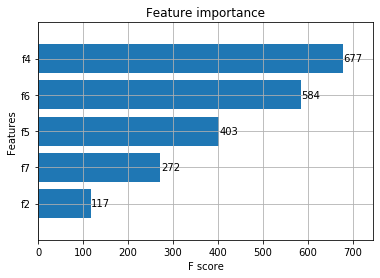

In [52]:
xgb.plot_importance(xgb_cv.best_estimator_, height=0.8, max_num_features=5);

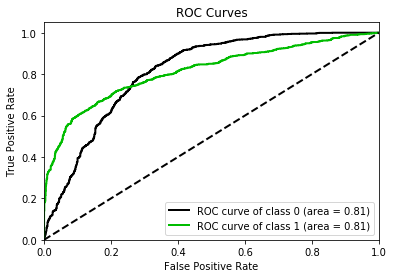

In [53]:
skplt.metrics.plot_roc(y_test, y_predicted_xgb, plot_micro=False, plot_macro=False);

In [54]:
xgb_cv.score(X_train, y_train), xgb_cv.score(X_test,y_test)

(-0.348011470242858, -0.5048475429291744)

In [55]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1304
           1       0.81      0.61      0.69       980

    accuracy                           0.77      2284
   macro avg       0.78      0.75      0.75      2284
weighted avg       0.78      0.77      0.76      2284



In [56]:
xgb_auc = roc_auc_score(y_test, y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.814377269312633


## CatBoost

In [57]:
model_cat = catb.CatBoostClassifier()

In [58]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.026901
0:	learn: 0.6899257	total: 274ms	remaining: 4m 33s
1:	learn: 0.6872060	total: 411ms	remaining: 3m 25s
2:	learn: 0.6841018	total: 552ms	remaining: 3m 3s
3:	learn: 0.6811722	total: 690ms	remaining: 2m 51s
4:	learn: 0.6786617	total: 835ms	remaining: 2m 46s
5:	learn: 0.6754396	total: 972ms	remaining: 2m 41s
6:	learn: 0.6731550	total: 1.11s	remaining: 2m 37s
7:	learn: 0.6708433	total: 1.25s	remaining: 2m 35s
8:	learn: 0.6680880	total: 1.4s	remaining: 2m 34s
9:	learn: 0.6659282	total: 1.55s	remaining: 2m 33s
10:	learn: 0.6634854	total: 1.82s	remaining: 2m 43s
11:	learn: 0.6614379	total: 2.09s	remaining: 2m 52s
12:	learn: 0.6600594	total: 2.27s	remaining: 2m 52s
13:	learn: 0.6585267	total: 2.5s	remaining: 2m 55s
14:	learn: 0.6565543	total: 2.75s	remaining: 3m
15:	learn: 0.6548567	total: 2.95s	remaining: 3m 1s
16:	learn: 0.6534525	total: 3.31s	remaining: 3m 11s
17:	learn: 0.6521807	total: 3.49s	remaining: 3m 10s
18:	learn: 0.6505802	total: 3.79s	remaining: 3m 15s


158:	learn: 0.5634248	total: 25.3s	remaining: 2m 14s
159:	learn: 0.5630126	total: 25.5s	remaining: 2m 13s
160:	learn: 0.5626819	total: 25.6s	remaining: 2m 13s
161:	learn: 0.5622270	total: 25.8s	remaining: 2m 13s
162:	learn: 0.5619617	total: 25.9s	remaining: 2m 13s
163:	learn: 0.5616140	total: 26s	remaining: 2m 12s
164:	learn: 0.5612606	total: 26.2s	remaining: 2m 12s
165:	learn: 0.5609089	total: 26.3s	remaining: 2m 12s
166:	learn: 0.5606453	total: 26.5s	remaining: 2m 12s
167:	learn: 0.5604836	total: 26.6s	remaining: 2m 11s
168:	learn: 0.5601258	total: 26.8s	remaining: 2m 11s
169:	learn: 0.5598166	total: 26.9s	remaining: 2m 11s
170:	learn: 0.5596524	total: 27s	remaining: 2m 11s
171:	learn: 0.5594077	total: 27.2s	remaining: 2m 10s
172:	learn: 0.5590586	total: 27.3s	remaining: 2m 10s
173:	learn: 0.5588863	total: 27.4s	remaining: 2m 10s
174:	learn: 0.5584181	total: 27.6s	remaining: 2m 10s
175:	learn: 0.5580866	total: 27.7s	remaining: 2m 9s
176:	learn: 0.5576437	total: 27.9s	remaining: 2m 9s

316:	learn: 0.5223429	total: 49.4s	remaining: 1m 46s
317:	learn: 0.5219020	total: 49.5s	remaining: 1m 46s
318:	learn: 0.5215881	total: 49.7s	remaining: 1m 46s
319:	learn: 0.5212481	total: 49.8s	remaining: 1m 45s
320:	learn: 0.5211824	total: 50s	remaining: 1m 45s
321:	learn: 0.5209798	total: 50.1s	remaining: 1m 45s
322:	learn: 0.5207231	total: 50.3s	remaining: 1m 45s
323:	learn: 0.5204641	total: 50.4s	remaining: 1m 45s
324:	learn: 0.5201908	total: 50.5s	remaining: 1m 44s
325:	learn: 0.5199878	total: 50.7s	remaining: 1m 44s
326:	learn: 0.5197865	total: 50.9s	remaining: 1m 44s
327:	learn: 0.5194913	total: 51s	remaining: 1m 44s
328:	learn: 0.5192096	total: 51.2s	remaining: 1m 44s
329:	learn: 0.5189740	total: 51.3s	remaining: 1m 44s
330:	learn: 0.5186248	total: 51.4s	remaining: 1m 43s
331:	learn: 0.5182998	total: 51.6s	remaining: 1m 43s
332:	learn: 0.5180113	total: 51.7s	remaining: 1m 43s
333:	learn: 0.5178670	total: 51.9s	remaining: 1m 43s
334:	learn: 0.5176278	total: 52s	remaining: 1m 43s

472:	learn: 0.4852102	total: 1m 12s	remaining: 1m 20s
473:	learn: 0.4850102	total: 1m 12s	remaining: 1m 20s
474:	learn: 0.4847628	total: 1m 12s	remaining: 1m 20s
475:	learn: 0.4845451	total: 1m 12s	remaining: 1m 20s
476:	learn: 0.4842750	total: 1m 13s	remaining: 1m 20s
477:	learn: 0.4842291	total: 1m 13s	remaining: 1m 20s
478:	learn: 0.4840604	total: 1m 13s	remaining: 1m 19s
479:	learn: 0.4838135	total: 1m 13s	remaining: 1m 19s
480:	learn: 0.4835668	total: 1m 13s	remaining: 1m 19s
481:	learn: 0.4834112	total: 1m 13s	remaining: 1m 19s
482:	learn: 0.4831676	total: 1m 14s	remaining: 1m 19s
483:	learn: 0.4828707	total: 1m 14s	remaining: 1m 19s
484:	learn: 0.4826873	total: 1m 14s	remaining: 1m 18s
485:	learn: 0.4824513	total: 1m 14s	remaining: 1m 18s
486:	learn: 0.4822943	total: 1m 14s	remaining: 1m 18s
487:	learn: 0.4821353	total: 1m 14s	remaining: 1m 18s
488:	learn: 0.4819530	total: 1m 14s	remaining: 1m 18s
489:	learn: 0.4817314	total: 1m 15s	remaining: 1m 18s
490:	learn: 0.4814987	total:

626:	learn: 0.4591689	total: 1m 35s	remaining: 57s
627:	learn: 0.4590622	total: 1m 35s	remaining: 56.8s
628:	learn: 0.4589348	total: 1m 36s	remaining: 56.7s
629:	learn: 0.4588889	total: 1m 36s	remaining: 56.5s
630:	learn: 0.4587786	total: 1m 36s	remaining: 56.4s
631:	learn: 0.4586075	total: 1m 36s	remaining: 56.2s
632:	learn: 0.4584688	total: 1m 36s	remaining: 56.1s
633:	learn: 0.4583927	total: 1m 36s	remaining: 55.9s
634:	learn: 0.4583301	total: 1m 36s	remaining: 55.7s
635:	learn: 0.4582527	total: 1m 37s	remaining: 55.6s
636:	learn: 0.4581210	total: 1m 37s	remaining: 55.4s
637:	learn: 0.4580555	total: 1m 37s	remaining: 55.2s
638:	learn: 0.4579649	total: 1m 37s	remaining: 55.1s
639:	learn: 0.4578973	total: 1m 37s	remaining: 54.9s
640:	learn: 0.4577863	total: 1m 37s	remaining: 54.7s
641:	learn: 0.4577005	total: 1m 37s	remaining: 54.6s
642:	learn: 0.4575143	total: 1m 38s	remaining: 54.4s
643:	learn: 0.4573600	total: 1m 38s	remaining: 54.3s
644:	learn: 0.4572640	total: 1m 38s	remaining: 5

782:	learn: 0.4401323	total: 1m 59s	remaining: 33s
783:	learn: 0.4399491	total: 1m 59s	remaining: 32.9s
784:	learn: 0.4398062	total: 1m 59s	remaining: 32.7s
785:	learn: 0.4397608	total: 1m 59s	remaining: 32.6s
786:	learn: 0.4396737	total: 1m 59s	remaining: 32.4s
787:	learn: 0.4395581	total: 1m 59s	remaining: 32.3s
788:	learn: 0.4393645	total: 2m	remaining: 32.1s
789:	learn: 0.4391889	total: 2m	remaining: 32s
790:	learn: 0.4391030	total: 2m	remaining: 31.8s
791:	learn: 0.4390655	total: 2m	remaining: 31.7s
792:	learn: 0.4389572	total: 2m	remaining: 31.5s
793:	learn: 0.4389393	total: 2m 1s	remaining: 31.4s
794:	learn: 0.4388879	total: 2m 1s	remaining: 31.2s
795:	learn: 0.4388478	total: 2m 1s	remaining: 31.1s
796:	learn: 0.4387337	total: 2m 1s	remaining: 30.9s
797:	learn: 0.4386580	total: 2m 1s	remaining: 30.8s
798:	learn: 0.4385596	total: 2m 1s	remaining: 30.7s
799:	learn: 0.4384068	total: 2m 2s	remaining: 30.5s
800:	learn: 0.4383469	total: 2m 2s	remaining: 30.4s
801:	learn: 0.4382946	tot

939:	learn: 0.4247651	total: 2m 29s	remaining: 9.57s
940:	learn: 0.4247135	total: 2m 30s	remaining: 9.41s
941:	learn: 0.4246541	total: 2m 30s	remaining: 9.26s
942:	learn: 0.4245802	total: 2m 30s	remaining: 9.11s
943:	learn: 0.4244743	total: 2m 30s	remaining: 8.96s
944:	learn: 0.4243754	total: 2m 31s	remaining: 8.8s
945:	learn: 0.4243079	total: 2m 31s	remaining: 8.65s
946:	learn: 0.4240982	total: 2m 31s	remaining: 8.49s
947:	learn: 0.4240185	total: 2m 32s	remaining: 8.34s
948:	learn: 0.4239019	total: 2m 32s	remaining: 8.19s
949:	learn: 0.4238553	total: 2m 32s	remaining: 8.03s
950:	learn: 0.4237591	total: 2m 32s	remaining: 7.88s
951:	learn: 0.4236964	total: 2m 33s	remaining: 7.72s
952:	learn: 0.4236165	total: 2m 33s	remaining: 7.57s
953:	learn: 0.4235053	total: 2m 33s	remaining: 7.41s
954:	learn: 0.4233237	total: 2m 33s	remaining: 7.25s
955:	learn: 0.4232745	total: 2m 34s	remaining: 7.1s
956:	learn: 0.4232345	total: 2m 34s	remaining: 6.94s
957:	learn: 0.4231839	total: 2m 34s	remaining: 6

In [59]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [60]:
y_pred_cat = model_cat.predict(X_test)

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section6'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 6: Scoring</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [61]:
model_cat.score(X_train, y_train), model_cat.score(X_test,y_test)

(0.8427472321261025, 0.7631348511383538)

In [62]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.8214610460748717


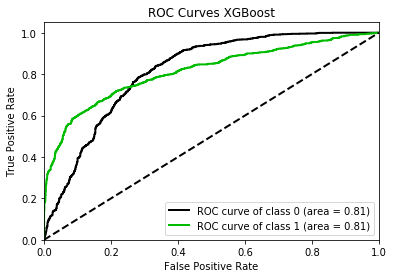

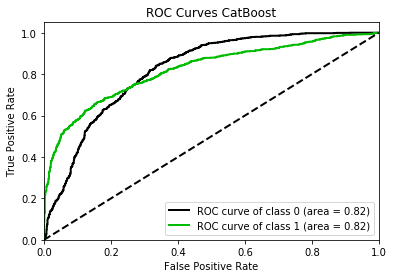

In [63]:
skplt.metrics.plot_roc(y_test, y_predicted_xgb, plot_micro=False, plot_macro=False, title = 'ROC Curves XGBoost')
skplt.metrics.plot_roc(y_test, y_predicted_cat, plot_micro=False, plot_macro=False, title = 'ROC Curves CatBoost');

## LGBM

In [64]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

In [65]:
params = {
    'boosting_type':'gbdt',
    'learning_rate': 0.02,
    'num_class': 2,
    'early_stopping': 100,
    'num_iteration': 2000, 
    'num_leaves': 31,
    'is_enable_sparse': 'true',
    'tree_learner': 'data',
    'max_depth': 4, 
    'n_estimators': 50  
    }

clf_gbm = lgbm.train(params, valid_sets=lgbm_eval)
predicted_LGBM = clf_gbm.predict(count_vect.transform(X_test))

print(accuracy_score(Y_test, predicted_LGBM))

NameError: name 'lgbm_eval' is not defined